VGG16 model trained on over 10 million images learnt how to detect generic features from images.

This model can be downlaoded as a feature extractor and combined with custom dense and output layers to predict custom images.

Popular pre-trained models for image recognition are:
1. VGG16/VGG19
2. InceptionV3
3. ResNet50

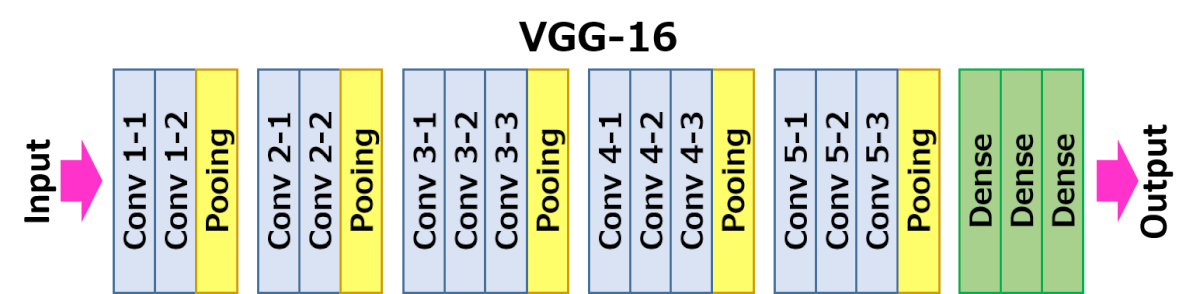

1. Top layer means Dense layers.
2. VGG16 got 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 milion images belonging to 1000 classes.
3. VGG16 was trained fro weeks and used NVIDIA Titan Black GPU's.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow
from tensorflow import keras

In [19]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [21]:
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16

VGG16 was trained on (224,224,3) img size but we can train on any input size image

In [22]:
SIZE = 256

In [23]:
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("vgg16_images/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

daisy
vgg16_images/train\daisy\100080576_f52e8ee070_n.jpg
vgg16_images/train\daisy\102841525_bd6628ae3c.jpg
vgg16_images/train\daisy\1031799732_e7f4008c03.jpg
vgg16_images/train\daisy\105806915_a9c13e2106_n.jpg
vgg16_images/train\daisy\107592979_aaa9cdfe78_m.jpg
vgg16_images/train\daisy\1140299375_3aa7024466.jpg
vgg16_images/train\daisy\1150395827_6f94a5c6e4_n.jpg
vgg16_images/train\daisy\11642632_1e7627a2cc.jpg
vgg16_images/train\daisy\1265350143_6e2b276ec9.jpg
vgg16_images/train\daisy\1285423653_18926dc2c8_n.jpg
vgg16_images/train\daisy\1286274236_1d7ac84efb_n.jpg
vgg16_images/train\daisy\12891819633_e4c82b51e8.jpg
vgg16_images/train\daisy\1299501272_59d9da5510_n.jpg
vgg16_images/train\daisy\1306119996_ab8ae14d72_n.jpg
vgg16_images/train\daisy\1314069875_da8dc023c6_m.jpg
vgg16_images/train\daisy\1342002397_9503c97b49.jpg
vgg16_images/train\daisy\134372449_0f7166d96c_n.jpg
vgg16_images/train\daisy\134409839_71069a95d1_m.jpg
vgg16_images/train\daisy\1344985627_c3115e2d71_n.jpg
vgg16_im

vgg16_images/train\daisy\2077865117_9ed85191ae_n.jpg
vgg16_images/train\daisy\2087343668_ef4fb95787_n.jpg
vgg16_images/train\daisy\20948886919_cac7844f34_n.jpg
vgg16_images/train\daisy\21402054779_759366efb0_n.jpg
vgg16_images/train\daisy\21626652132_97e1318bb8_m.jpg
vgg16_images/train\daisy\21652746_cc379e0eea_m.jpg
vgg16_images/train\daisy\21805938544_bf6bb0e4bc.jpg
vgg16_images/train\daisy\2213954589_c7da4b1486.jpg
vgg16_images/train\daisy\22244161124_53e457bb66_n.jpg
vgg16_images/train\daisy\22873310415_3a5674ec10_m.jpg
vgg16_images/train\daisy\23095658544_7226386954_n.jpg
vgg16_images/train\daisy\2331133004_582772d58f_m.jpg
vgg16_images/train\daisy\2346726545_2ebce2b2a6.jpg
vgg16_images/train\daisy\2349640101_212c275aa7.jpg
vgg16_images/train\daisy\2351206867_084e57bd97.jpg
vgg16_images/train\daisy\2365428551_39f83f10bf_n.jpg
vgg16_images/train\daisy\2408024540_37f0be7cc0_n.jpg
vgg16_images/train\daisy\2454280135_ac3aa75cdc_n.jpg
vgg16_images/train\daisy\2454280137_e1637536ae_n.jp

vgg16_images/train\daisy\4440480869_632ce6aff3_n.jpg
vgg16_images/train\daisy\446484749_4044affcaf_n.jpg
vgg16_images/train\daisy\4482623536_b9fb5ae41f_n.jpg
vgg16_images/train\daisy\4496202781_1d8e776ff5_n.jpg
vgg16_images/train\daisy\450128527_fd35742d44.jpg
vgg16_images/train\daisy\4511693548_20f9bd2b9c_m.jpg
vgg16_images/train\daisy\452854574_59492f119a_m.jpg
vgg16_images/train\daisy\4534460263_8e9611db3c_n.jpg
vgg16_images/train\daisy\4538877108_3c793f7987_m.jpg
vgg16_images/train\daisy\4540555191_3254dc4608_n.jpg
vgg16_images/train\daisy\4544110929_a7de65d65f_n.jpg
vgg16_images/train\daisy\4561871220_47f420ca59_m.jpg
vgg16_images/train\daisy\4563059851_45a9d21a75.jpg
vgg16_images/train\daisy\4565255237_9ba29c4d4e_n.jpg
vgg16_images/train\daisy\4581199679_867652c3f1_n.jpg
vgg16_images/train\daisy\4598422221_b37313a3e3_n.jpg
vgg16_images/train\daisy\459931395_24bf6531fe_n.jpg
vgg16_images/train\daisy\4610018126_21f438d2dc_m.jpg
vgg16_images/train\daisy\4613992315_143ccc2a10_m.jpg
v

vgg16_images/train\dandelion\10443973_aeb97513fc_m.jpg
vgg16_images/train\dandelion\10477378514_9ffbcec4cf_m.jpg
vgg16_images/train\dandelion\10486992895_20b344ce2d_n.jpg
vgg16_images/train\dandelion\10617162044_8740d4dd9f_n.jpg
vgg16_images/train\dandelion\10617191174_9a01753241_n.jpg
vgg16_images/train\dandelion\10683189_bd6e371b97.jpg
vgg16_images/train\dandelion\1074999133_1e4a1e042e.jpg
vgg16_images/train\dandelion\10777398353_5a20bb218c.jpg
vgg16_images/train\dandelion\10778387133_9141024b10.jpg
vgg16_images/train\dandelion\10779476016_9130714dc0.jpg
vgg16_images/train\dandelion\1080179756_5f05350a59.jpg
vgg16_images/train\dandelion\10828951106_c3cd47983f.jpg
vgg16_images/train\dandelion\10919961_0af657c4e8.jpg
vgg16_images/train\dandelion\10946896405_81d2d50941_m.jpg
vgg16_images/train\dandelion\11124381625_24b17662bd_n.jpg
vgg16_images/train\dandelion\1128626197_3f52424215_n.jpg
vgg16_images/train\dandelion\11296320473_1d9261ddcb.jpg
vgg16_images/train\dandelion\11405573_24a8a8

vgg16_images/train\dandelion\151979452_9832f08b69.jpg
vgg16_images/train\dandelion\15219268336_f2460fca88_m.jpg
vgg16_images/train\dandelion\15268682367_5a4512b29f_m.jpg
vgg16_images/train\dandelion\15297244181_011883a631_m.jpg
vgg16_images/train\dandelion\15358221063_2c6e548e84.jpg
vgg16_images/train\dandelion\15378782362_4161b23af7_m.jpg
vgg16_images/train\dandelion\15381511376_fd743b7330_n.jpg
vgg16_images/train\dandelion\15547944931_c1e095b185.jpg
vgg16_images/train\dandelion\15549402199_2890918ddb.jpg
vgg16_images/train\dandelion\155646858_9a8b5e8fc8.jpg
vgg16_images/train\dandelion\15644450971_6a28298454_n.jpg
vgg16_images/train\dandelion\15782158700_3b9bf7d33e_m.jpg
vgg16_images/train\dandelion\15819121091_26a5243340_n.jpg
vgg16_images/train\dandelion\15821571649_06c4b9a868_n.jpg
vgg16_images/train\dandelion\158988663_6fe055fcb4.jpg
vgg16_images/train\dandelion\15987457_49dc11bf4b.jpg
vgg16_images/train\dandelion\16041975_2f6c1596e5.jpg
vgg16_images/train\dandelion\160456948_38c

vgg16_images/train\dandelion\19961979110_fcd8092388_m.jpg
vgg16_images/train\dandelion\20165867412_fc45d31698_m.jpg
vgg16_images/train\dandelion\2019520447_48b2354a20_m.jpg
vgg16_images/train\dandelion\2039797043_d5b709f275_n.jpg
vgg16_images/train\dandelion\20456824132_b1c8fbfa41_m.jpg
vgg16_images/train\dandelion\20754920332_53b995fc63_n.jpg
vgg16_images/train\dandelion\2076141453_c63801962a_m.jpg
vgg16_images/train\dandelion\20983660733_06b35b9eb8.jpg
vgg16_images/train\dandelion\2116997627_30fed84e53_m.jpg
vgg16_images/train\dandelion\21195621914_a5bdbb203d.jpg
vgg16_images/train\dandelion\2133943140_9fc7bcc9aa.jpg
vgg16_images/train\dandelion\21523597492_39b6765cd7_m.jpg
vgg16_images/train\dandelion\2161283279_02ea3ff8d4.jpg
vgg16_images/train\dandelion\21657726011_2c94e341bc_n.jpg
vgg16_images/train\dandelion\22190242684_8c3300d4e6.jpg
vgg16_images/train\dandelion\22196426956_eca94f6faa_m.jpg
vgg16_images/train\dandelion\22274701614_901606ee34_n.jpg
vgg16_images/train\dandelion\2

vgg16_images/train\dandelion\4696437766_85952d0196.jpg
vgg16_images/train\dandelion\4708723476_a1b476a373.jpg
vgg16_images/train\dandelion\4713958242_fbcfe9a61b_m.jpg
vgg16_images/train\dandelion\4714026966_93846ddb74_m.jpg
vgg16_images/train\dandelion\4716316039_044e4d2d1a.jpg
vgg16_images/train\dandelion\4721773235_429acdf496_n.jpg
vgg16_images/train\dandelion\477207005_6327db8393_m.jpg
vgg16_images/train\dandelion\477316928_a70a31a704_m.jpg
vgg16_images/train\dandelion\478851599_25bfd70605_n.jpg
vgg16_images/train\dandelion\479115838_0771a6cdff.jpg
vgg16_images/train\dandelion\479495978_ee22cf05be.jpg
vgg16_images/train\dandelion\480621885_4c8b50fa11_m.jpg
vgg16_images/train\dandelion\483097906_2c35054346.jpg
vgg16_images/train\dandelion\4844697927_c70d644f40_n.jpg
vgg16_images/train\dandelion\4847150510_7a5db086fa.jpg
vgg16_images/train\dandelion\4858372040_52216eb0bd.jpg
vgg16_images/train\dandelion\4862011506_4faf6d127e_n.jpg
vgg16_images/train\dandelion\486234138_688e01aa9b_n.jp

vgg16_images/train\dandelion\7270523166_b62fc9e5f1_m.jpg
vgg16_images/train\dandelion\7280217714_fb9ffccf2d_n.jpg
vgg16_images/train\dandelion\7280221020_98b473b20d_n.jpg
vgg16_images/train\dandelion\7280222348_a87725ca77.jpg
vgg16_images/train\dandelion\7280227122_7ea2bef7f4_n.jpg
vgg16_images/train\dandelion\7291185504_b740bbeba4_m.jpg
vgg16_images/train\dandelion\7295618968_c08a326cc1_m.jpg
vgg16_images/train\dandelion\7308600792_27cff2f73f.jpg
vgg16_images/train\dandelion\7315832212_b0ceeb8de8_n.jpg
vgg16_images/train\dandelion\7355522_b66e5d3078_m.jpg
vgg16_images/train\dandelion\7367491658_9eb4dc2384_m.jpg
vgg16_images/train\dandelion\7368435774_0045b9dc4e.jpg
vgg16_images/train\dandelion\7368449232_c99f49b2e6_n.jpg
vgg16_images/train\dandelion\7401173270_ebaf04c9b0_n.jpg
vgg16_images/train\dandelion\7425858848_d04dab08dd_n.jpg
vgg16_images/train\dandelion\7448453384_fb9caaa9af_n.jpg
vgg16_images/train\dandelion\7465850028_cdfaae235a_n.jpg
vgg16_images/train\dandelion\7469617666_

vgg16_images/train\roses\123128873_546b8b7355_n.jpg
vgg16_images/train\roses\12323085443_8ac0cdb713_n.jpg
vgg16_images/train\roses\12338444334_72fcc2fc58_m.jpg
vgg16_images/train\roses\12395698413_c0388278f7.jpg
vgg16_images/train\roses\12406229175_82e2ac649c_n.jpg
vgg16_images/train\roses\12406418663_af20dc225f_n.jpg
vgg16_images/train\roses\12407768513_3440238148_n.jpg
vgg16_images/train\roses\12434194695_a7c4e73c6b_n.jpg
vgg16_images/train\roses\12450781274_eb78723921.jpg
vgg16_images/train\roses\12562723334_a2e0a9e3c8_n.jpg
vgg16_images/train\roses\12572786553_634868f7f2_n.jpg
vgg16_images/train\roses\13231224664_4af5293a37.jpg
vgg16_images/train\roses\13235124703_a7e1266e44.jpg
vgg16_images/train\roses\13264214185_d6aa79b3bd.jpg
vgg16_images/train\roses\13279526615_a3b0059bec.jpg
vgg16_images/train\roses\13342823005_16d3df58df_n.jpg
vgg16_images/train\roses\1392579828_ab5a139052.jpg
vgg16_images/train\roses\13929462317_96342a9a44.jpg
vgg16_images/train\roses\13979889721_42a59ca9fa

vgg16_images/train\roses\19823402005_2db025dd66_m.jpg
vgg16_images/train\roses\19919867648_043cf02fc3.jpg
vgg16_images/train\roses\19988406792_68201f76e3_n.jpg
vgg16_images/train\roses\20409866779_ac473f55e0_m.jpg
vgg16_images/train\roses\2053476785_c162a3e358.jpg
vgg16_images/train\roses\2059172936_032ffc12aa.jpg
vgg16_images/train\roses\20596941736_f2c5f496cf.jpg
vgg16_images/train\roses\20622485918_90fc000c86_n.jpg
vgg16_images/train\roses\2065522422_cfdd80044a_n.jpg
vgg16_images/train\roses\20825078671_90b0389c70_m.jpg
vgg16_images/train\roses\2093263381_afd51358a3.jpg
vgg16_images/train\roses\2122401867_cd86c5f114_n.jpg
vgg16_images/train\roses\21346056089_e6f8074e5f_m.jpg
vgg16_images/train\roses\21347496068_f4d3339607.jpg
vgg16_images/train\roses\21413573151_e681c6a97a.jpg
vgg16_images/train\roses\2141413229_3f0425f972_n.jpg
vgg16_images/train\roses\21522100663_455b77a90c_n.jpg
vgg16_images/train\roses\2183357362_4b4da4b6b5.jpg
vgg16_images/train\roses\218630974_5646dafc63_m.jpg

vgg16_images/train\roses\563847503_89e9756c80.jpg
vgg16_images/train\roses\568715474_bdb64ccc32.jpg
vgg16_images/train\roses\5717319579_190e85c7d1_m.jpg
vgg16_images/train\roses\5721768347_2ec4d2247b_n.jpg
vgg16_images/train\roses\5731750490_ba3325b7ee_n.jpg
vgg16_images/train\roses\5736328472_8f25e6f6e7.jpg
vgg16_images/train\roses\5777669976_a205f61e5b.jpg
vgg16_images/train\roses\5799616059_0ffda02e54.jpg
vgg16_images/train\roses\5835539224_75967fc400_m.jpg
vgg16_images/train\roses\5840476802_dfa40deb1f_m.jpg
vgg16_images/train\roses\5863698305_04a4277401_n.jpg
vgg16_images/train\roses\5892908233_6756199a43.jpg
vgg16_images/train\roses\5897035797_e67bf68124_n.jpg
vgg16_images/train\roses\5960270643_1b8a94822e_m.jpg
vgg16_images/train\roses\5961803532_9368212949_m.jpg
vgg16_images/train\roses\5979193298_639e877248.jpg
vgg16_images/train\roses\5990626258_697f007308_n.jpg
vgg16_images/train\roses\6016195304_75306bb79a.jpg
vgg16_images/train\roses\6036837996_7fbdcdb3c5_n.jpg
vgg16_image

vgg16_images/train\sunflowers\1008566138_6927679c8a.jpg
vgg16_images/train\sunflowers\1022552002_2b93faf9e7_n.jpg
vgg16_images/train\sunflowers\1022552036_67d33d5bd8_n.jpg
vgg16_images/train\sunflowers\10386503264_e05387e1f7_m.jpg
vgg16_images/train\sunflowers\10386522775_4f8c616999_m.jpg
vgg16_images/train\sunflowers\10386525005_fd0b7d6c55_n.jpg
vgg16_images/train\sunflowers\10386525695_2c38fea555_n.jpg
vgg16_images/train\sunflowers\10386540106_1431e73086_m.jpg
vgg16_images/train\sunflowers\10386540696_0a95ee53a8_n.jpg
vgg16_images/train\sunflowers\10386702973_e74a34c806_n.jpg
vgg16_images/train\sunflowers\1043442695_4556c4c13d_n.jpg
vgg16_images/train\sunflowers\1044296388_912143e1d4.jpg
vgg16_images/train\sunflowers\1064662314_c5a7891b9f_m.jpg
vgg16_images/train\sunflowers\10862313945_e8ed9202d9_m.jpg
vgg16_images/train\sunflowers\11881770944_22b4f2f8f6_n.jpg
vgg16_images/train\sunflowers\1217254584_4b3028b93d.jpg
vgg16_images/train\sunflowers\12282924083_fb80aa17d4_n.jpg
vgg16_imag

vgg16_images/train\sunflowers\184683023_737fec5b18.jpg
vgg16_images/train\sunflowers\18766965343_9f42d4bedc_m.jpg
vgg16_images/train\sunflowers\1880606744_23e3dc4f6b_n.jpg
vgg16_images/train\sunflowers\18828277053_1493158b28.jpg
vgg16_images/train\sunflowers\18828283553_e46504ae38.jpg
vgg16_images/train\sunflowers\18843967474_9cb552716b.jpg
vgg16_images/train\sunflowers\18972803569_1a0634f398_m.jpg
vgg16_images/train\sunflowers\19349582128_68a662075e_n.jpg
vgg16_images/train\sunflowers\19359539074_d7e32e6616_n.jpg
vgg16_images/train\sunflowers\193874852_fb633d8d00_n.jpg
vgg16_images/train\sunflowers\193878348_43571127b9_n.jpg
vgg16_images/train\sunflowers\19442589512_e733cfea0f.jpg
vgg16_images/train\sunflowers\19453165201_2aa747e0bf.jpg
vgg16_images/train\sunflowers\19504937128_a4ae90fcbd_m.jpg
vgg16_images/train\sunflowers\19508264965_d1dfb565ea_n.jpg
vgg16_images/train\sunflowers\19519101829_46af0b4547_m.jpg
vgg16_images/train\sunflowers\19595718862_c68896370c_m.jpg
vgg16_images/tra

vgg16_images/train\sunflowers\2960610406_b61930727f_n.jpg
vgg16_images/train\sunflowers\2979133707_84aab35b5d.jpg
vgg16_images/train\sunflowers\2979297519_17a08b37f6_m.jpg
vgg16_images/train\sunflowers\2980154410_bffd7a3452_n.jpg
vgg16_images/train\sunflowers\2996573407_5e473b9359.jpg
vgg16_images/train\sunflowers\29972905_4cc537ff4b_n.jpg
vgg16_images/train\sunflowers\3001531316_efae24d37d_n.jpg
vgg16_images/train\sunflowers\3001533700_1c62fb8b4a_n.jpg
vgg16_images/train\sunflowers\3001536784_3bfd101b23_n.jpg
vgg16_images/train\sunflowers\3062794421_295f8c2c4e.jpg
vgg16_images/train\sunflowers\310380634_60e6c79989.jpg
vgg16_images/train\sunflowers\3146795631_d062f233c1.jpg
vgg16_images/train\sunflowers\3154932076_eff5c38231_n.jpg
vgg16_images/train\sunflowers\3154932290_4bf43bd34f_n.jpg
vgg16_images/train\sunflowers\3196753837_411b03682d_n.jpg
vgg16_images/train\sunflowers\3311874685_7b9ef10f7e_m.jpg
vgg16_images/train\sunflowers\3334350831_f8755a2095_n.jpg
vgg16_images/train\sunflowe

vgg16_images/train\sunflowers\6958724008_12259943a7.jpg
vgg16_images/train\sunflowers\7012364067_5ffc7654c9_m.jpg
vgg16_images/train\sunflowers\7012366081_019c8a17a4_m.jpg
vgg16_images/train\sunflowers\7176723954_e41618edc1_n.jpg
vgg16_images/train\sunflowers\7176729016_d73ff2211e.jpg
vgg16_images/train\sunflowers\7176729812_7c053921fb_m.jpg
vgg16_images/train\sunflowers\7176736574_14446539cb_n.jpg
vgg16_images/train\sunflowers\7270375648_79f0caef42_n.jpg
vgg16_images/train\sunflowers\7369484298_332f69bd88_n.jpg
vgg16_images/train\sunflowers\7510240282_87554c7418_n.jpg
vgg16_images/train\sunflowers\7510262868_cf7d6f6f25_n.jpg
vgg16_images/train\sunflowers\7510285306_ba8f80c382_n.jpg
vgg16_images/train\sunflowers\7530313068_ddd2dc1f44_m.jpg
vgg16_images/train\sunflowers\7581713708_8eae6794f2.jpg
vgg16_images/train\sunflowers\7586498522_4dcab1c8d2_m.jpg
vgg16_images/train\sunflowers\7603036176_9e8967cd21.jpg
vgg16_images/train\sunflowers\7652532108_01ef94c476.jpg
vgg16_images/train\sunfl

vgg16_images/train\tulips\12024561754_ce9667e4dc_n.jpg
vgg16_images/train\tulips\12025038686_7f10811d4b_n.jpg
vgg16_images/train\tulips\12025042086_78bafc0eb6_n.jpg
vgg16_images/train\tulips\12163418275_bd6a1edd61.jpg
vgg16_images/train\tulips\122450705_9885fff3c4_n.jpg
vgg16_images/train\tulips\12517756805_56b74be742.jpg
vgg16_images/train\tulips\12548574923_5e90f4ceea.jpg
vgg16_images/train\tulips\12557176134_ecbf15885b.jpg
vgg16_images/train\tulips\12584810723_c97d00fcfd.jpg
vgg16_images/train\tulips\12616825773_9aa4245b57_n.jpg
vgg16_images/train\tulips\12764617214_12211c6a0c_m.jpg
vgg16_images/train\tulips\12873145295_438b8197a7_n.jpg
vgg16_images/train\tulips\12883412424_cb5086b43f_n.jpg
vgg16_images/train\tulips\12916017805_1cde91a891_n.jpg
vgg16_images/train\tulips\12916135413_dafcf3089e_n.jpg
vgg16_images/train\tulips\12916441224_2ed63596f8_n.jpg
vgg16_images/train\tulips\12934201824_1c8b5171fb_m.jpg
vgg16_images/train\tulips\12949131454_4d3392f4dd_n.jpg
vgg16_images/train\tul

vgg16_images/train\tulips\142235237_da662d925c.jpg
vgg16_images/train\tulips\142235914_5419ff8a4a.jpg
vgg16_images/train\tulips\14235021006_dd001ea8ed_n.jpg
vgg16_images/train\tulips\14254839301_ffb19c6445_n.jpg
vgg16_images/train\tulips\14255917256_84c23c572b.jpg
vgg16_images/train\tulips\14262354955_cc2ab3b112_m.jpg
vgg16_images/train\tulips\14266093711_66d18a1e44_n.jpg
vgg16_images/train\tulips\14270573963_f122c40438.jpg
vgg16_images/train\tulips\14275234071_6e6f473356.jpg
vgg16_images/train\tulips\14278331403_4c475f9a9b.jpg
vgg16_images/train\tulips\14487705209_ea723109e1_m.jpg
vgg16_images/train\tulips\14487712670_aebe715525_m.jpg
vgg16_images/train\tulips\14487762578_baba13d16a_m.jpg
vgg16_images/train\tulips\14487943607_651e8062a1_m.jpg
vgg16_images/train\tulips\14491997336_36ba524713.jpg
vgg16_images/train\tulips\14651383746_419dc73634_m.jpg
vgg16_images/train\tulips\14651385476_7ccb20e594_m.jpg
vgg16_images/train\tulips\14671196461_b725727229_m.jpg
vgg16_images/train\tulips\14

vgg16_images/train\tulips\4418204816_018375acd0_m.jpg
vgg16_images/train\tulips\4442928974_9672d630b2_n.jpg
vgg16_images/train\tulips\4497973347_57480ffee9_m.jpg
vgg16_images/train\tulips\4497976955_3f8c2a21c1_m.jpg
vgg16_images/train\tulips\4508346090_a27b988f79_n.jpg
vgg16_images/train\tulips\4516198427_0e5099cd8e.jpg
vgg16_images/train\tulips\4520577328_a94c11e806_n.jpg
vgg16_images/train\tulips\4520582070_d14a14f038.jpg
vgg16_images/train\tulips\4521037085_70d5802e1d_m.jpg
vgg16_images/train\tulips\4521496161_2b41d4182e.jpg
vgg16_images/train\tulips\4522130258_9ee44cf73f_m.jpg
vgg16_images/train\tulips\4522153453_06437ca3af_m.jpg
vgg16_images/train\tulips\4522764992_e9d70b82c1_m.jpg
vgg16_images/train\tulips\4525067924_177ea3bfb4.jpg
vgg16_images/train\tulips\4546299243_23cd58eb43.jpg
vgg16_images/train\tulips\4546316433_202cc68c55.jpg
vgg16_images/train\tulips\4550091966_7f3e0f8802_n.jpg
vgg16_images/train\tulips\4550117239_5907aaba4c.jpg
vgg16_images/train\tulips\4550278535_dfdf7

vgg16_images/train\tulips\7064813645_f7f48fb527.jpg
vgg16_images/train\tulips\7068715863_a534ac7884_n.jpg
vgg16_images/train\tulips\7069622551_348d41c327_n.jpg
vgg16_images/train\tulips\7070694881_e9a331fa4e_n.jpg
vgg16_images/train\tulips\7082476907_99beef0dde.jpg
vgg16_images/train\tulips\7082608511_f4cf233f59_n.jpg
vgg16_images/train\tulips\7094271655_79a6f972c1_n.jpg
vgg16_images/train\tulips\7094415739_6b29e5215c_m.jpg
vgg16_images/train\tulips\7136973281_b2a935ce20.jpg
vgg16_images/train\tulips\7144016605_e159b6c06b_m.jpg
vgg16_images/train\tulips\7145978709_2d1596f462.jpg
vgg16_images/train\tulips\7166539842_43b7e02883.jpg
vgg16_images/train\tulips\7166550328_de0d73cfa9.jpg
vgg16_images/train\tulips\7166552648_28b6dce578.jpg
vgg16_images/train\tulips\7166554924_432aaae4b2_n.jpg
vgg16_images/train\tulips\7166564830_8b34a3fd35_n.jpg
vgg16_images/train\tulips\7166567320_0a2beb6d42.jpg
vgg16_images/train\tulips\7166570828_7c26ca5766_n.jpg
vgg16_images/train\tulips\7166598930_18d8686

In [24]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [28]:
#Capture validation data and labels into respective lists
test_images = []
test_labels = [] 

for directory_path in glob.glob("vgg16_images/validation/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

daisy
vgg16_images/validation\daisy\10140303196_b88d3d6cec.jpg
vgg16_images/validation\daisy\10172379554_b296050f82_n.jpg
vgg16_images/validation\daisy\10172567486_2748826a8b.jpg
vgg16_images/validation\daisy\10172636503_21bededa75_n.jpg
vgg16_images/validation\daisy\10391248763_1d16681106_n.jpg
vgg16_images/validation\daisy\10437754174_22ec990b77_m.jpg
vgg16_images/validation\daisy\10437770546_8bb6f7bdd3_m.jpg
vgg16_images/validation\daisy\10437929963_bc13eebe0c.jpg
vgg16_images/validation\daisy\10466290366_cc72e33532.jpg
vgg16_images/validation\daisy\10466558316_a7198b87e2.jpg
vgg16_images/validation\daisy\10555749515_13a12a026e.jpg
vgg16_images/validation\daisy\10555815624_dc211569b0.jpg
vgg16_images/validation\daisy\10555826524_423eb8bf71_n.jpg
vgg16_images/validation\daisy\10559679065_50d2b16f6d.jpg
vgg16_images/validation\daisy\10712722853_5632165b04.jpg
vgg16_images/validation\daisy\10770585085_4742b9dac3_n.jpg
vgg16_images/validation\daisy\10841136265_af473efc60.jpg
vgg16_image

vgg16_images/validation\dandelion\2995221296_a6ddaccc39.jpg
vgg16_images/validation\dandelion\3005677730_2662753d3f_m.jpg
vgg16_images/validation\dandelion\3021333497_b927cd8596.jpg
vgg16_images/validation\dandelion\3149809654_6a4b31314d_n.jpg
vgg16_images/validation\dandelion\3198028825_fdfaa1d020.jpg
vgg16_images/validation\dandelion\3297108443_0393d04dfc_m.jpg
vgg16_images/validation\dandelion\3357432116_b3dce6fed3_n.jpg
vgg16_images/validation\dandelion\3365850019_8158a161a8_n.jpg
vgg16_images/validation\dandelion\3372748508_e5a4eacfcb_n.jpg
vgg16_images/validation\dandelion\3383422012_6c9d83671f_n.jpg
vgg16_images/validation\dandelion\3393060921_2328b752f4.jpg
vgg16_images/validation\dandelion\3393564906_f2df184b76_n.jpg
vgg16_images/validation\dandelion\3398195641_456872b48b_n.jpg
vgg16_images/validation\dandelion\3418355347_2bdcca592a.jpg
vgg16_images/validation\dandelion\3419166382_a5e4b8fe6d_m.jpg
vgg16_images/validation\dandelion\3419172904_7708414ae9_n.jpg
vgg16_images/valid

vgg16_images/validation\roses\3661675690_ed2d05fa5f_n.jpg
vgg16_images/validation\roses\3663244576_97f595cf4a.jpg
vgg16_images/validation\roses\3664842094_5fd60ee26b.jpg
vgg16_images/validation\roses\3667366832_7a8017c528_n.jpg
vgg16_images/validation\roses\3697780051_83e50a6dd1_m.jpg
vgg16_images/validation\roses\3705716290_cb7d803130_n.jpg
vgg16_images/validation\roses\3713368809_eba7fa2fbf_m.jpg
vgg16_images/validation\roses\3742155164_14b557a51c_n.jpg
vgg16_images/validation\roses\3742168238_d961937e68_n.jpg
vgg16_images/validation\roses\3751835302_d5a03f55e8_n.jpg
vgg16_images/validation\roses\3753920123_c7ebc18ee3.jpg
vgg16_images/validation\roses\3829990289_c0c3821e4d_m.jpg
vgg16_images/validation\roses\3871586333_5a708d5cf4_n.jpg
vgg16_images/validation\roses\3872230296_6c477309f3_n.jpg
vgg16_images/validation\roses\3873271620_1d9d314f01_n.jpg
vgg16_images/validation\roses\3903276582_fe05bf84c7_n.jpg
vgg16_images/validation\roses\3909587261_f8cd3e7fe7.jpg
vgg16_images/validatio

vgg16_images/validation\sunflowers\4980406384_791774d953.jpg
vgg16_images/validation\sunflowers\4989952542_35f2cdd5e2_n.jpg
vgg16_images/validation\sunflowers\5004121118_e9393e60d0_n.jpg
vgg16_images/validation\sunflowers\5007598545_90e08e81c1_n.jpg
vgg16_images/validation\sunflowers\5015462205_440898fe41_n.jpg
vgg16_images/validation\sunflowers\5018120483_cc0421b176_m.jpg
vgg16_images/validation\sunflowers\5020805135_1219d7523d.jpg
vgg16_images/validation\sunflowers\5020805619_6c710793f7.jpg
vgg16_images/validation\sunflowers\5025805406_033cb03475_n.jpg
vgg16_images/validation\sunflowers\5027895361_ace3b731e5_n.jpg
vgg16_images/validation\sunflowers\5028817729_f04d32bac8_n.jpg
vgg16_images/validation\sunflowers\5032376020_2ed312306c.jpg
vgg16_images/validation\sunflowers\5037531593_e2daf4c7f1.jpg
vgg16_images/validation\sunflowers\5037790727_57c527494f.jpg
vgg16_images/validation\sunflowers\5042785753_392cc4e74d_n.jpg
vgg16_images/validation\sunflowers\5043404000_9bc16cb7e5_m.jpg
vgg1

vgg16_images/validation\tulips\3498663243_42b39b4185_m.jpg
vgg16_images/validation\tulips\3501996215_1c6d1a3386_n.jpg
vgg16_images/validation\tulips\3502085373_edc2c36992_n.jpg
vgg16_images/validation\tulips\3502251824_3be758edc6_m.jpg
vgg16_images/validation\tulips\3502615974_ef4bd13202_n.jpg
vgg16_images/validation\tulips\3502632842_791dd4be18_n.jpg
vgg16_images/validation\tulips\3502685880_f026400dce_n.jpg
vgg16_images/validation\tulips\3502974120_9f1eceaf8b_n.jpg
vgg16_images/validation\tulips\391477275_7c2f50a1a7_m.jpg
vgg16_images/validation\tulips\402525114_eaa60c8341_m.jpg
vgg16_images/validation\tulips\405035580_94b793e71d.jpg
vgg16_images/validation\tulips\420216121_3ee33723d7_m.jpg
vgg16_images/validation\tulips\430785322_7ddef64c68_m.jpg
vgg16_images/validation\tulips\434146736_310a42d9cb_m.jpg
vgg16_images/validation\tulips\440714501_9f8268e1b0.jpg
vgg16_images/validation\tulips\443600168_cb08d56511.jpg
vgg16_images/validation\tulips\444963906_e41492b692.jpg
vgg16_images/v

In [29]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [30]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
le.fit(test_labels)
test_labels_encoded  = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [32]:
X_train = train_images
y_train = train_labels_encoded
X_test = test_images
y_test = test_labels_encoded

In [33]:
X_train = X_train/255
X_test = X_test/255

In [37]:
# from tensorflow.keras.utils import to_categorical
# y_train_one_hot = to_categorical(y_train)
# y_test_one_hot = to_categorical(y_test)

In [44]:
#Load model wothout classifier/fully connected layers

VGG_model = VGG16(weights="imagenet", include_top=False, 
                  input_shape=(SIZE,SIZE,3))

In [45]:
VGG_model.summary()  #Trainable parameters will be all of them

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [46]:
# Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
    layer.trainable = False
    
## we can choose each layer which we want to train or not...

In [47]:
VGG_model.summary()  #Trainable parameters will be 0

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [49]:
feature_extractor = VGG_model.predict(X_train)

In [50]:
feature_extractor.shape

(3065, 8, 8, 512)

In [51]:
features = feature_extractor.reshape(feature_extractor.shape[0],-1)

In [52]:
features.shape   ## this goes further in Random Forest

(3065, 32768)

In [53]:
X_for_RF = features

In [71]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 5000, random_state = 42)

In [72]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=5000, random_state=42)

In [ ]:
##Testing data..

In [56]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(X_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [73]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)

In [74]:
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [75]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.8049586776859504


In [76]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_RF)

In [77]:
cm

array([[ 71,  27,   4,   8,  11],
       [  2, 108,   1,   7,   3],
       [  0,   5, 101,   2,  13],
       [  3,   6,   6,  98,   8],
       [  1,   2,   7,   2, 109]], dtype=int64)